In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../DataAccess/Datasets/Reviews.csv")
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [4]:
df[df['Summary'].isna()][['Summary', 'Text']]

,Summary,Text
33958,NaN,I only used two maybe three tea bags and got p...
40548,NaN,I only used two maybe three tea bags and got p...
101106,NaN,I only used two maybe three tea bags and got p...
102979,NaN,I only used two maybe three tea bags and got p...
117515,NaN,I only used two maybe three tea bags and got p...
155712,NaN,I only used two maybe three tea bags and got p...
178290,NaN,I only used two maybe three tea bags and got p...
198474,NaN,I only used two maybe three tea bags and got p...
212691,NaN,I only used two maybe three tea bags and got p...
237565,NaN,This is a cool system only problem is that the...


In [5]:
top_5 = df.groupby('ProductId').size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
# top_5.sort_values(ascending=False).nlargest(10)
top_5

,ProductId,Count
71170,B007JFMH8M,913
37898,B0026RQTGE,632
42257,B002QWHJOU,632
42263,B002QWP89S,632
42264,B002QWP8H0,632
46205,B003B3OOPA,623
28624,B001EO5Q64,567
37798,B0026KPDG8,564
20497,B000VK8AVK,564
68860,B006HYLW32,564


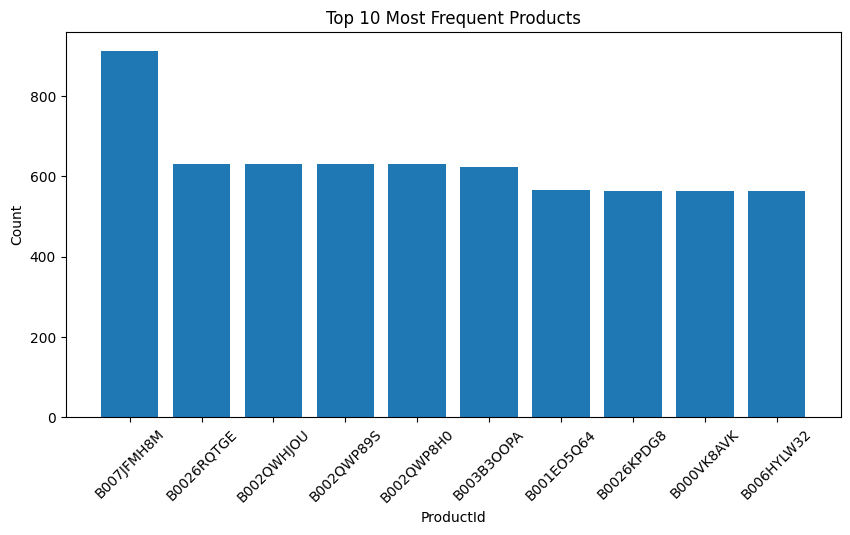

In [6]:
plt.figure(figsize=(10,5))
plt.bar(top_5['ProductId'], top_5['Count'])
plt.xlabel('ProductId')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Products')
plt.xticks(rotation = 45)
plt.show()

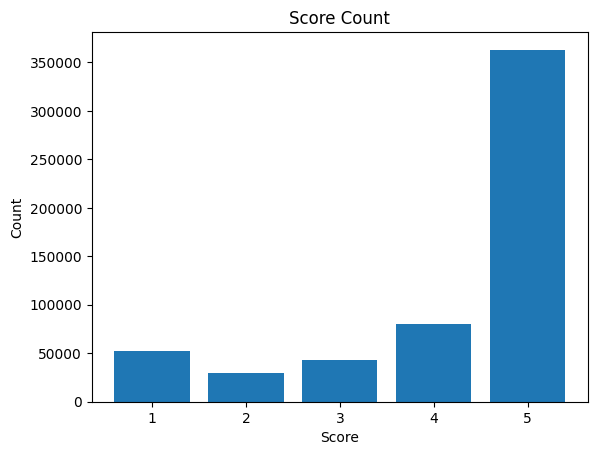

In [7]:
df_score = df.groupby('Score').size().reset_index(name='Count').sort_index(ascending=False)
df_score

plt.Figure(figsize=(5,5))
plt.bar(df_score['Score'], df_score['Count'])
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Count')
plt.show()

In [8]:
df['Status'] = df['Score'].apply(lambda x: 'Positive' if 0 < x <= 3 else 'Negative')
df['Status']

0         Negative
1         Positive
2         Negative
3         Positive
4         Negative
            ...   
568449    Negative
568450    Positive
568451    Negative
568452    Negative
568453    Negative
Name: Status, Length: 568454, dtype: object

[]

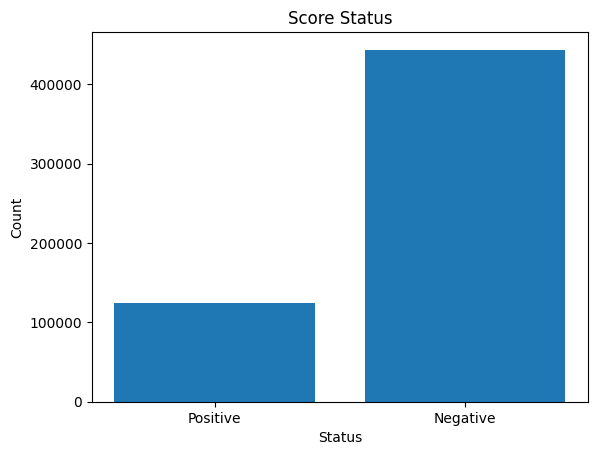

In [9]:
df_status = df.groupby('Status').size().reset_index(name='Count').sort_index(ascending=False)

plt.Figure(figsize=(5,5))
plt.bar(df_status['Status'], df_status['Count'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Score Status')
plt.plot()

### Removing special characters and converting to lower case

In [12]:
import re
from bs4 import BeautifulSoup

df['Text'] = df['Text'].apply(str).map(lambda x: re.sub('[?|!|\'|"|#|.|,|)|(|\|/]', '', x))
df['text'] = df['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').getText())
df['Text'] = df['Text'].apply(str).map(lambda x: x.lower())

In [ ]:
# pip install beautifulsoup4

  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
Using cached soupsieve-2.7-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
for index, row in df[:10].iterrows():
    print(index, '', row['Text'][:100])

0  i have bought several of the vitality canned dog food products and have found them all to be of good
1  product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not su
2  this is a confection that has been around a few centuries  it is a light pillowy citrus gelatin with
3  if you are looking for the secret ingredient in robitussin i believe i have found it  i got this in 
4  great taffy at a great price  there was a wide assortment of yummy taffy  delivery was very quick  i
5  i got a wild hair for taffy and ordered this five pound bag the taffy was all very enjoyable with ma
6  this saltwater taffy had great flavors and was very soft and chewy  each candy was individually wrap
7  this taffy is so good  it is very soft and chewy  the flavors are amazing  i would definitely recomm
8  right now im mostly just sprouting this so my cats can eat the grass they love it i rotate it around
9  this is a very healthy dog food good for their digestion also

### Tokenization (Split the text into words, subwords, or tokens)

#### 1- Simple Tokenization

In [14]:
# df['Text_Simple_Tokenization'] = df['Text'].apply(lambda x: x.split())
# df['Text_Simple_Tokenization']

#### 2- SpaCy

In [15]:
# pip install spacy
# python -m spacy download en_core_web_sm  -> Run in Terminal

import spacy

# nlp = spacy.load('en_core_web_sm')
# df['Text_SpaCy'] = None
# for index , row in df.iterrows():
#     doc = nlp(row['Text'])
#     tokens = [token.text for token in doc]
#     df.at[index, 'Text_SpaCy'] = tokens

#------------------- it takes too much time
# nlp = spacy.load('en_core_web_sm')
# df['Text_SpaCy'] = df['Text'].apply(lambda x: [token.text for token in nlp(x)])
# df['Text_SpaCy']


#-----------------------
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])  # Disable unused pipeline parts
texts = df['Text'].astype(str).tolist()  # Ensure all values are strings

# Use spaCy's efficient pipeline streaming
docs = nlp.pipe(texts, batch_size=100)

# Collect tokens for each document
df['Text_SpaCy'] = [[token.text for token in doc] for doc in docs]

In [16]:
df['Text_SpaCy']

0         [i, have, bought, several, of, the, vitality, ...
1         [product, arrived, labeled, as, jumbo, salted,...
2         [this, is, a, confection, that, has, been, aro...
3         [if, you, are, looking, for, the, secret, ingr...
4         [great, taffy, at, a, great, price,  , there, ...
                                ...                        
568449    [great, for, sesame, chickenthis, is, a, good,...
568450    [i, m, disappointed, with, the, flavor, the, c...
568451    [these, stars, are, small, so, you, can, give,...
568452    [these, are, the, best, treats, for, training,...
568453    [i, am, very, satisfied, product, is, as, adve...
Name: Text_SpaCy, Length: 568454, dtype: object

### Lemmatizing & Removing Stopwords and Punctuations


In [17]:
texts = df['Text'].astype(str).tolist()
docs = nlp.pipe(texts, batch_size=100)

df['Lemmas']=[[token.lemma_ for token in doc if not token.is_stop and not token.is_punct and len(token) > 2] for doc in docs]
df['Lemmas']

0         [buy, vitality, can, dog, food, product, find,...
1         [product, arrive, label, jumbo, salt, peanutst...
2         [confection, century, light, pillowy, citrus, ...
3         [look, secret, ingredient, robitussin, believe...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chickenthis, good, well, restu...
568450    [disappointed, flavor, chocolate, note, especi...
568451    [star, small, training, session, try, train, d...
568452    [good, treat, training, reward, dog, good, gro...
568453    [satisfied, product, advertise, use, cereal, r...
Name: Lemmas, Length: 568454, dtype: object

### Generate N-gram(Unigram, Bigram, Trigram)

In [ ]:
# pip install gensim

In [ ]:
## Run in Terminal
# pip install numpy --upgrade
# pip install gensim --upgrade

In [18]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [19]:
# Step 1: Learn bigrams from lemmas
bigram_model= Phrases(df['Lemmas'], min_count=5, threshold=100) #Train model
bigram_phraser = Phraser(bigram_model) #Optimize it

# Step 2: Apply bigrams
df['Bigram'] = [bigram_phraser[doc] for doc in df['Lemmas']]

# Step 3: Learn trigrams from bigrammed text
trigram_model = Phrases(df['Bigram'], min_count=5, threshold=100)
trigram_phraser = Phraser(trigram_model)

# Step 4: Apply trigrams
df['Trigram'] = [trigram_phraser[doc] for doc in df['Bigram']]

In [20]:
for row in df['Bigram'][:1000]:
    print([word for word in row if '_' in word])

[]
[]
['lion_witch']
['root_beer']
[]
['root_beer']
['saltwater_taffy', 'individually_wrap']
[]
[]
[]
[]
[]
[]
[]
['guilty_pleasure']
['hit_spot']
['zip_lock']
[]
['united_states']
[]
['timely_manner']
['href_http']
[]
['weight_watcher']
[]
['href_http']
[]
[]
[]
[]
['dolce_gusto']
[]
['fructose_corn', 'guar_gum', 'guar_gum']
['mccanns_steel']
[]
['mccann_steel', 'post_bariatric']
['celiac_disease']
[]
[]
['href_http']
[]
[]
[]
[]
['mccann_steel']
['pass_muster']
['follow_direction']
[]
[]
[]
['quaker_oats']
['bloody_mary']
['vermont_country', 'apple_cider', 'vermont_maple', 'ass_kickin', 'evenly_distribute', 'ass_kickin']
[]
[]
['cast_iron']
['trick_treater']
['kit_kat']
[]
[]
[]
[]
[]
['endurance_athlete']
['bike_ride']
[]
['leg_cramp']
[]
[]
[]
['albanese_gummi']
['gummy_bear', 'gummy_bear', 'gummy_bear', 'gummy_bear', 'gummy_bear']
[]
['buyer_beware', 'everybody_maltitol', 'undigestible_body', 'intestinal_bloating', 'massive_amount', 'learn_lesson', 'suzanne_sommer', 'balloon_painf

In [21]:
for row in df['Trigram'][:1000]:
    print([word for word in row if '_' in word])

[]
[]
['lion_witch_wardrobe']
['root_beer']
[]
['root_beer']
['saltwater_taffy', 'individually_wrap', 'theme_party']
[]
[]
[]
[]
[]
[]
[]
['guilty_pleasure']
['hit_spot']
['zip_lock_baggie']
[]
['united_states']
[]
['timely_manner']
['href_http']
[]
['weight_watcher']
[]
['href_http']
[]
[]
[]
[]
['dolce_gusto']
[]
['mccanns_instant', 'fructose_corn_syrup', 'guar_gum', 'guar_gum']
['mccanns_steel_cut']
['mccanns_instant', 'mccanns_instant']
['mccanns_instant', 'mccann_steel', 'post_bariatric']
['celiac_disease', 'mccanns_instant']
[]
['mccanns_instant']
['href_http']
[]
[]
[]
[]
['mccann_steel']
['pass_muster']
['follow_direction']
[]
[]
[]
['quaker_oats']
['bloody_mary']
['vermont_country', 'apple_cider', 'vermont_maple', 'ass_kickin', 'evenly_distribute', 'ass_kickin']
[]
[]
['cast_iron']
['trick_treater']
['kit_kat']
[]
[]
[]
[]
[]
['endurance_athlete']
['bike_ride']
[]
['leg_cramp']
[]
[]
[]
['albanese_gummi']
['gummy_bear', 'gummy_bear', 'gummy_bear', 'gummy_bear', 'gummy_bear']
[

In [22]:
df_positive = df[df['Status'] == 'Positive']
positive_words = [word for lemmas in df_positive['Lemmas'] for word in lemmas]

df_negative = df[df['Status'] == 'Negative']
negative_words = [word for lemmas in df_negative['Lemmas'] for word in lemmas]

In [23]:
# nested = [['hello', 'world'], ['goodbye', 'moon']]
# flat = [word for sublist in nested for word in sublist]


# nested = [[['hello', 'world'], ['goodbye', 'moon']],[['Azadeh', 'Soodabeh']]]
# flat = [word for sublist_2 in nested for sublist in sublist_2 for word in sublist] 

### Visualization

### Text Vectorization

### 1- One-Hot-Encoding (It's not used in this problem, since it's sparce and large)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
category= np.array( ["Red", "Green", "Blue", "Yellow", "Pink"])

category = category.reshape(-1, 1)
one_hot_encoder = OneHotEncoder()
result_one_hot_encoder = one_hot_encoder.fit_transform(category)
print(result_one_hot_encoder.toarray())

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


### 2- Word2Vec (CBOW & Skip-gram)

In [26]:
from gensim.models import Word2Vec

sentences = df['Trigram'].tolist()
cbow_model  = Word2Vec(sentences, vector_size=100, sg=0, window=5, min_count=2, workers=4, epochs=10)

In [27]:
skipgram_model = Word2Vec(sentences, vector_size=100, sg=1, window=5, min_count=2, workers=4, epochs=10)

In [28]:
cbow_vector = cbow_model.wv['tea']
cbow_vector

array([ 1.6538883 ,  1.4574832 ,  1.6380597 ,  4.657935  ,  1.7231126 ,
       -3.328197  ,  0.17778121,  0.2253989 , -0.92537045,  1.4839286 ,
        3.6968203 ,  4.0908747 , -0.650772  ,  0.00771382,  0.29494432,
       -0.0399519 , -0.03649713, -1.0694057 , -1.230677  , -0.18510659,
       -2.4394455 , -2.5266917 , -1.6439486 , -1.7973368 , -0.70706964,
       -4.6463118 , -5.1835966 , -0.66481525, -2.201449  , -1.9961743 ,
        0.744341  , -1.3546659 , -3.5339537 ,  1.8293527 , -2.1189032 ,
        4.0433884 ,  0.4380825 , -2.8907497 , -2.919474  , -1.3523004 ,
       -2.7892337 , -0.94756395,  1.0665593 , -0.9684605 ,  0.2624283 ,
       -3.0574608 ,  1.4329275 , -0.9191809 , -1.598123  , -0.11532392,
       -0.28685272, -3.8153162 ,  1.2741339 ,  1.6972357 , -2.9671397 ,
        0.0613642 ,  0.00571071,  0.34809443,  3.0222132 ,  0.53867984,
       -0.22237918,  2.0433388 ,  1.1307628 ,  0.8077699 , -0.0113037 ,
        2.1134734 ,  2.8558583 , -3.968372  , -2.5068858 ,  1.91

In [29]:
cbow_model.wv.most_similar('cofee')

[('coffee', 0.7193461060523987),
 ('coffe', 0.6970710158348083),
 ('expresso', 0.6838756799697876),
 ('espresso', 0.6571558713912964),
 ('french_press', 0.6316127181053162),
 ('moka', 0.6299181580543518),
 ('coffeeespresso', 0.6239400506019592),
 ('bunn', 0.6227074861526489),
 ('joe', 0.6208446025848389),
 ('melita', 0.6173476576805115)]

In [30]:
skipgram_model.wv.most_similar('cofee')

[('coffee', 0.7244747281074524),
 ('coffe', 0.6760340332984924),
 ('espressocappuccino', 0.6683110594749451),
 ('espresso', 0.6666525602340698),
 ('longhi', 0.6662169098854065),
 ('moka_express', 0.6636139750480652),
 ('coffeesmooth', 0.658566415309906),
 ('coffeeespresso', 0.6526005864143372),
 ('tassimocom', 0.6506322026252747),
 ('basecamp', 0.6498287916183472)]

### Average word vectors per review

In [32]:
def get_doc_vector(tokens, model):
    valid_words = [word for word in tokens if word in model.wv]
    if valid_words:
        return np.mean(model.wv[valid_words], axis=0)
    else:
        return np.zeros(model.vector_size)      

In [33]:
df['DocVector'] = df['Trigram'].apply(lambda x: get_doc_vector(x, cbow_model))
df['DocVector']

0         [-0.22582354, -0.41891462, 0.47685128, -1.4944...
1         [-0.06789601, 0.16043928, 0.2477436, -0.702526...
2         [-0.30462784, -0.66501904, -0.54698336, 0.0870...
3         [0.42035085, -1.603615, -0.027002834, 0.345432...
4         [0.489594, -1.5045561, -0.38380492, 0.47545674...
                                ...                        
568449    [-0.22967543, -0.8445203, -0.6365162, 0.077093...
568450    [0.024688017, -1.5282763, 0.28613794, 0.838942...
568451    [-0.28289166, -0.067640446, -0.16731343, -1.27...
568452    [-0.18351685, 0.12865576, -0.51676226, -0.3635...
568453    [0.1525879, -0.79888743, -0.07177154, -1.17459...
Name: DocVector, Length: 568454, dtype: object

### Machine Learning Methods

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [35]:
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label="Positive")
    precision = precision_score(y_true, y_pred, pos_label="Positive")
    f1Score = f1_score(y_true, y_pred, pos_label="Positive")

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall:   {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'f1_score: {f1Score:.4f}')

In [36]:
X = np.vstack(df['DocVector'].values)
y = df['Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, y_train.shape

((454763, 100), (454763,))

In [37]:
model_lgs = LogisticRegression()
model_lgs.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = model_lgs.predict(X_test)
evaluate_classification(y_test, y_pred)

Accuracy: 0.8613
Recall:   0.5452
Precision: 0.7473
f1_score: 0.6304


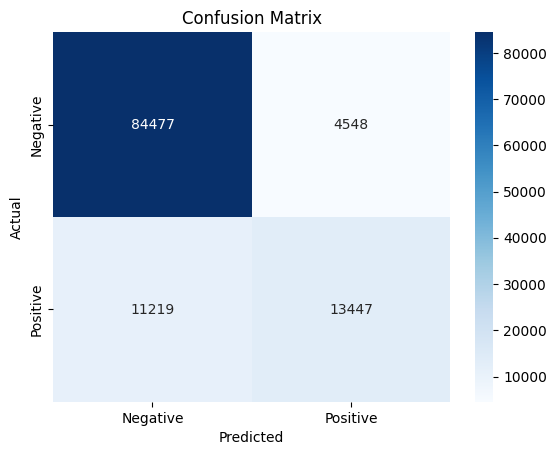


True Negatives : 84477
False Positives: 4548
False Negatives: 11219
True Positives : 13447


In [39]:
labels=['Negative','Positive']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', fmt='d', annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Extract TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

print(f"\nTrue Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives : {tp}")

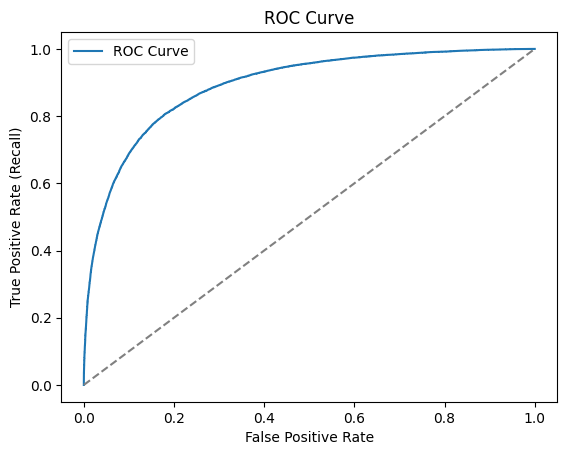

In [40]:

y_scores = model_lgs.predict_proba(X_test)[:, 1]  # probability for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label='Positive')

auc_value = roc_auc_score(y_test, y_scores)
# print(f'auc_score: {roc_auc :.4f}')

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

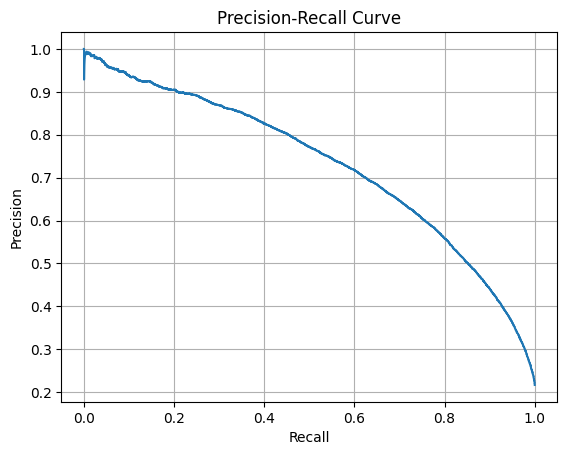

In [41]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label='Positive')

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [42]:
index = 2
dd= X_test[index]
result = y_test[index]
result

'Positive'

In [43]:
X_test.shape
dd = np.array(dd)
dd = dd.reshape(-1, 100)
dd.shape

(1, 100)

In [44]:
model_lgs.predict(dd)[0]

'Positive'

In [45]:
# use TF-IDF with Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer

X_tfidf = df['Text']
y_tfidf = df['Status']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, random_state=42, shuffle=True, test_size=0.2)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_tfidf)
X_test_tfidf = tfidf.transform(X_test_tfidf)

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
evaluate_classification(y_test, y_pred_tfidf)

Accuracy: 0.9062
Recall:   0.7203
Precision: 0.8253
f1_score: 0.7693


In [46]:
# use TF-IDF by using Tokenizing text and Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer

# X_tfidf = df['Lemmas']
X_tfidf = df['Lemmas'].apply(lambda x: ' '.join(x))
y_tfidf = df['Status']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, random_state=42, shuffle=True, test_size=0.2)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_tfidf)
X_test_tfidf = tfidf.transform(X_test_tfidf)

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
evaluate_classification(y_test, y_pred_tfidf)

Accuracy: 0.8871
Recall:   0.6388
Precision: 0.8007
f1_score: 0.7106


### Recurrent Nueral Network

In [52]:
# # pip install tensorflow==2.13.0

In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [98]:
all_words = [word for subset in df['Lemmas'] for word in subset] # get all words
vocab = set(all_words) # remove duplicates

word_index = {word: idx+1 for idx, word in enumerate(vocab)} # asign index

sequences = [[word_index[word] for word in doc if word in word_index ] for doc in df['Lemmas']] # convert sentences to the list of indexes

input_dim = len(vocab) + 1  # +1 for padding token (common practice)
print(f"input_dim: {input_dim}")

max_len = max(len(seq) for seq in df['Lemmas']) # get the longest sentence
print(f"max_len: {max_len}")

max_len = 100 # since the 1740 is too much

input_dim: 179873
max_len: 1740


In [ ]:
# pads shorter sequences with zeros (or another value) so that all sequences are the same length.
# padding='post'-> Pads after the actual data (adds zeros at the end)
    # [4, 9, 13] → [4, 9, 13, 0, 0]  # if maxlen = 5
X = pad_sequences(sequences, max_len, padding='post')
y_int =  df['Status'].apply(lambda x: 1 if x == 'Positive' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y_int, random_state=42, shuffle=True, test_size=0.2)
epochs=5
batch_size=64

In [ ]:
model_rnn = tf.keras.Sequential()

model_rnn.add(tf.keras.layers.Embedding(input_dim=input_dim, output_dim=128, input_length=max_len))
model_rnn.add(tf.keras.layers.SimpleRNN(64))
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 128)          23023744  
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23036161 (87.88 MB)
Trainable params: 23036161 (87.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# # Automatically save model weights after each epoch, and resume training later if interrupted (e.g. crash, restart)

# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint_path="./Checkpoints/model_bert_epoch_{epoch:02d}.weights.h5"

# checkpoint_callback=ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_weights_only=True,
#     save_freq='epoch',
#     verbose=1
# )

# # Resume Training If Checkpoint Exists

# latest_checkpoint=tf.train.latest_checkpoint("./Checkpoints")

# if latest_checkpoint:
#     print(f"Resuming from checkpoint:{latest_checkpoint}")
#     model.load_weights(latest_checkpoint)
# else:
#     print("Starting training from scratch.")

In [ ]:
history = model_rnn.fit(
    X_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(X_test, y_test)
    # callbacks=checkpoint_callback
    )

Epoch 1/5
7106/7106 [==============================] - 1415s 199ms/step - loss: 0.5212 - accuracy: 0.7816 - val_loss: 0.5178 - val_accuracy: 0.7861
Epoch 2/5
7106/7106 [==============================] - 1262s 178ms/step - loss: 0.5141 - accuracy: 0.7867 - val_loss: 0.5147 - val_accuracy: 0.7873
Epoch 3/5
7106/7106 [==============================] - 1359s 191ms/step - loss: 0.5030 - accuracy: 0.7879 - val_loss: 0.5056 - val_accuracy: 0.7868
Epoch 4/5
7106/7106 [==============================] - 1361s 192ms/step - loss: 0.5043 - accuracy: 0.7903 - val_loss: 0.5187 - val_accuracy: 0.7868
Epoch 5/5
7106/7106 [==============================] - 2058s 290ms/step - loss: 0.5043 - accuracy: 0.7914 - val_loss: 0.5200 - val_accuracy: 0.7865


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

In [ ]:
# pip install transformers datasets scikit-learn

  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
     ---------------------------------------- 0.0/74.8 kB ? eta -:--:--
     ---------------------------------------- 74.8/74.8 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.4 MB 9.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/10.4 MB 8.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.4 MB 10.8 MB/s eta 0:00:01
   ----- ---------------------------------- 1.4/10.4 MB 9.0 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/10.4 MB 9.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/10.4 MB 9.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.4 MB 9.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.0/10.4 MB 9.1 MB/s eta 0:00:01
   ------------- ----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Using [CLS] for classification

In [121]:
from transformers import TFBertModel, BertTokenizer

In [123]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [124]:
X = df['Text'].tolist()
y = df['Status'].tolist()

# Tokenizing the data
encoded = tokenizer(X, padding=True, truncation=True, max_length=128, return_tensors='tf', return_attention_mask=True)

In [130]:
input_ids = np.array(encoded['input_ids'])
attension_mask = np.array(encoded['attention_mask'])

# ساخت dataset با batching
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': encoded['input_ids'],
        'attention_mask': encoded['attention_mask']
    }
)).batch(32)  # می‌تونی بسته به رم سیستم این مقدار رو کمتر کنی (مثل 16 یا 8)

cls_embeddings = []

for batch in dataset:
    outputs = bert_model(batch['input_ids'], attention_mask=batch['attention_mask'])
    cls_batch = outputs.last_hidden_state[:, 0, :]  # فقط توکن CLS
    cls_embeddings.append(cls_batch)

# اتصال همه batchها
cls_embeddings = tf.concat(cls_embeddings, axis=0)

KeyboardInterrupt: 

In [125]:
# using LogistcRegression

from sklearn.linear_model import LogisticRegression

X = cls_embeddings.numpy()
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

NameError: name 'cls_embeddings' is not defined

### Using Transformer(BERT) - Fine-tune

In [105]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X = list(df['Text'])
y = list(df['Status'])

f:\Python\FastAPI\env_nlp\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\AsusIran\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
encoding = tokenizer(X, truncation=True, padding=True, max_length=128, return_tensors='tf')
encoding

{'input_ids': <tf.Tensor: shape=(568454, 128), dtype=int32, numpy=
array([[ 101, 1045, 2031, ...,    0,    0,    0],
       [ 101, 4031, 3369, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       ...,
       [ 101, 2122, 3340, ...,    0,    0,    0],
       [ 101, 2122, 2024, ...,    0,    0,    0],
       [ 101, 1045, 2572, ...,    0,    0,    0]])>, 'token_type_ids': <tf.Tensor: shape=(568454, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(568454, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [112]:
input_ids = np.array(encoding['input_ids'])
y = np.array(y)
attention_mask = np.array(encoding['attention_mask'])

X_train_idx, X_test_idx, y_train_idx, y_test_ids = train_test_split(input_ids, y, test_size=0.2, random_state=42)
X_train_mask, X_test_mask = train_test_split(attention_mask, test_size=0.2, random_state=42)

In [113]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': X_train_idx, 'attention_mask': X_train_mask},
    y_train
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': X_test_idx, 'attention_mask': X_test_mask},
    y_test
)).batch(16)

In [114]:
from transformers import TFBertForSequenceClassification

model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_bert.compile(optimizer=optimizer, loss = loss, metrics=['accuracy'])

history = model_bert.fit(train_dataset, validation_data=test_dataset, epochs = 3)

In [ ]:
preds = model_bert.predict(test_dataset)

In [117]:
first_input = encoding['input_ids'][0]
first_input

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  1045,  2031,  4149,  2195,  1997,  1996,  8995,  3012,
       27141,  3899,  2833,  3688,  1998,  2031,  2179,  2068,  2035,
        2000,  2022,  1997,  2204,  3737,  1996,  4031,  3504,  2062,
        2066,  1037, 20717,  2084,  1037, 13995,  6240,  1998,  2009,
       14747,  2488,  2026, 18604,  2003, 10346,  6799,  2100,  1998,
        2016,  9120,  2015,  2023,  4031,  2488,  2084,  2087,   102,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [120]:
tokens = tokenizer.convert_ids_to_tokens(first_input)
tokens

['[CLS]',
 'i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vital',
 '##ity',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 'my',
 'labrador',
 'is',
 'fin',
 '##ick',
 '##y',
 'and',
 'she',
 'appreciate',
 '##s',
 'this',
 'product',
 'better',
 'than',
 'most',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
